In [4]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [5]:
#Read data
df = pd.read_csv('datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
# Change columns of type 'object' to 'int'
df['smoker'] = df['smoker'].astype('category').cat.codes

df['region'] = df['region'].astype('category').cat.codes

df['sex'] = df['sex'].astype('category').cat.codes

df.dtypes

age           int64
sex            int8
bmi         float64
children      int64
smoker         int8
region         int8
charges     float64
dtype: object

In [62]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [63]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


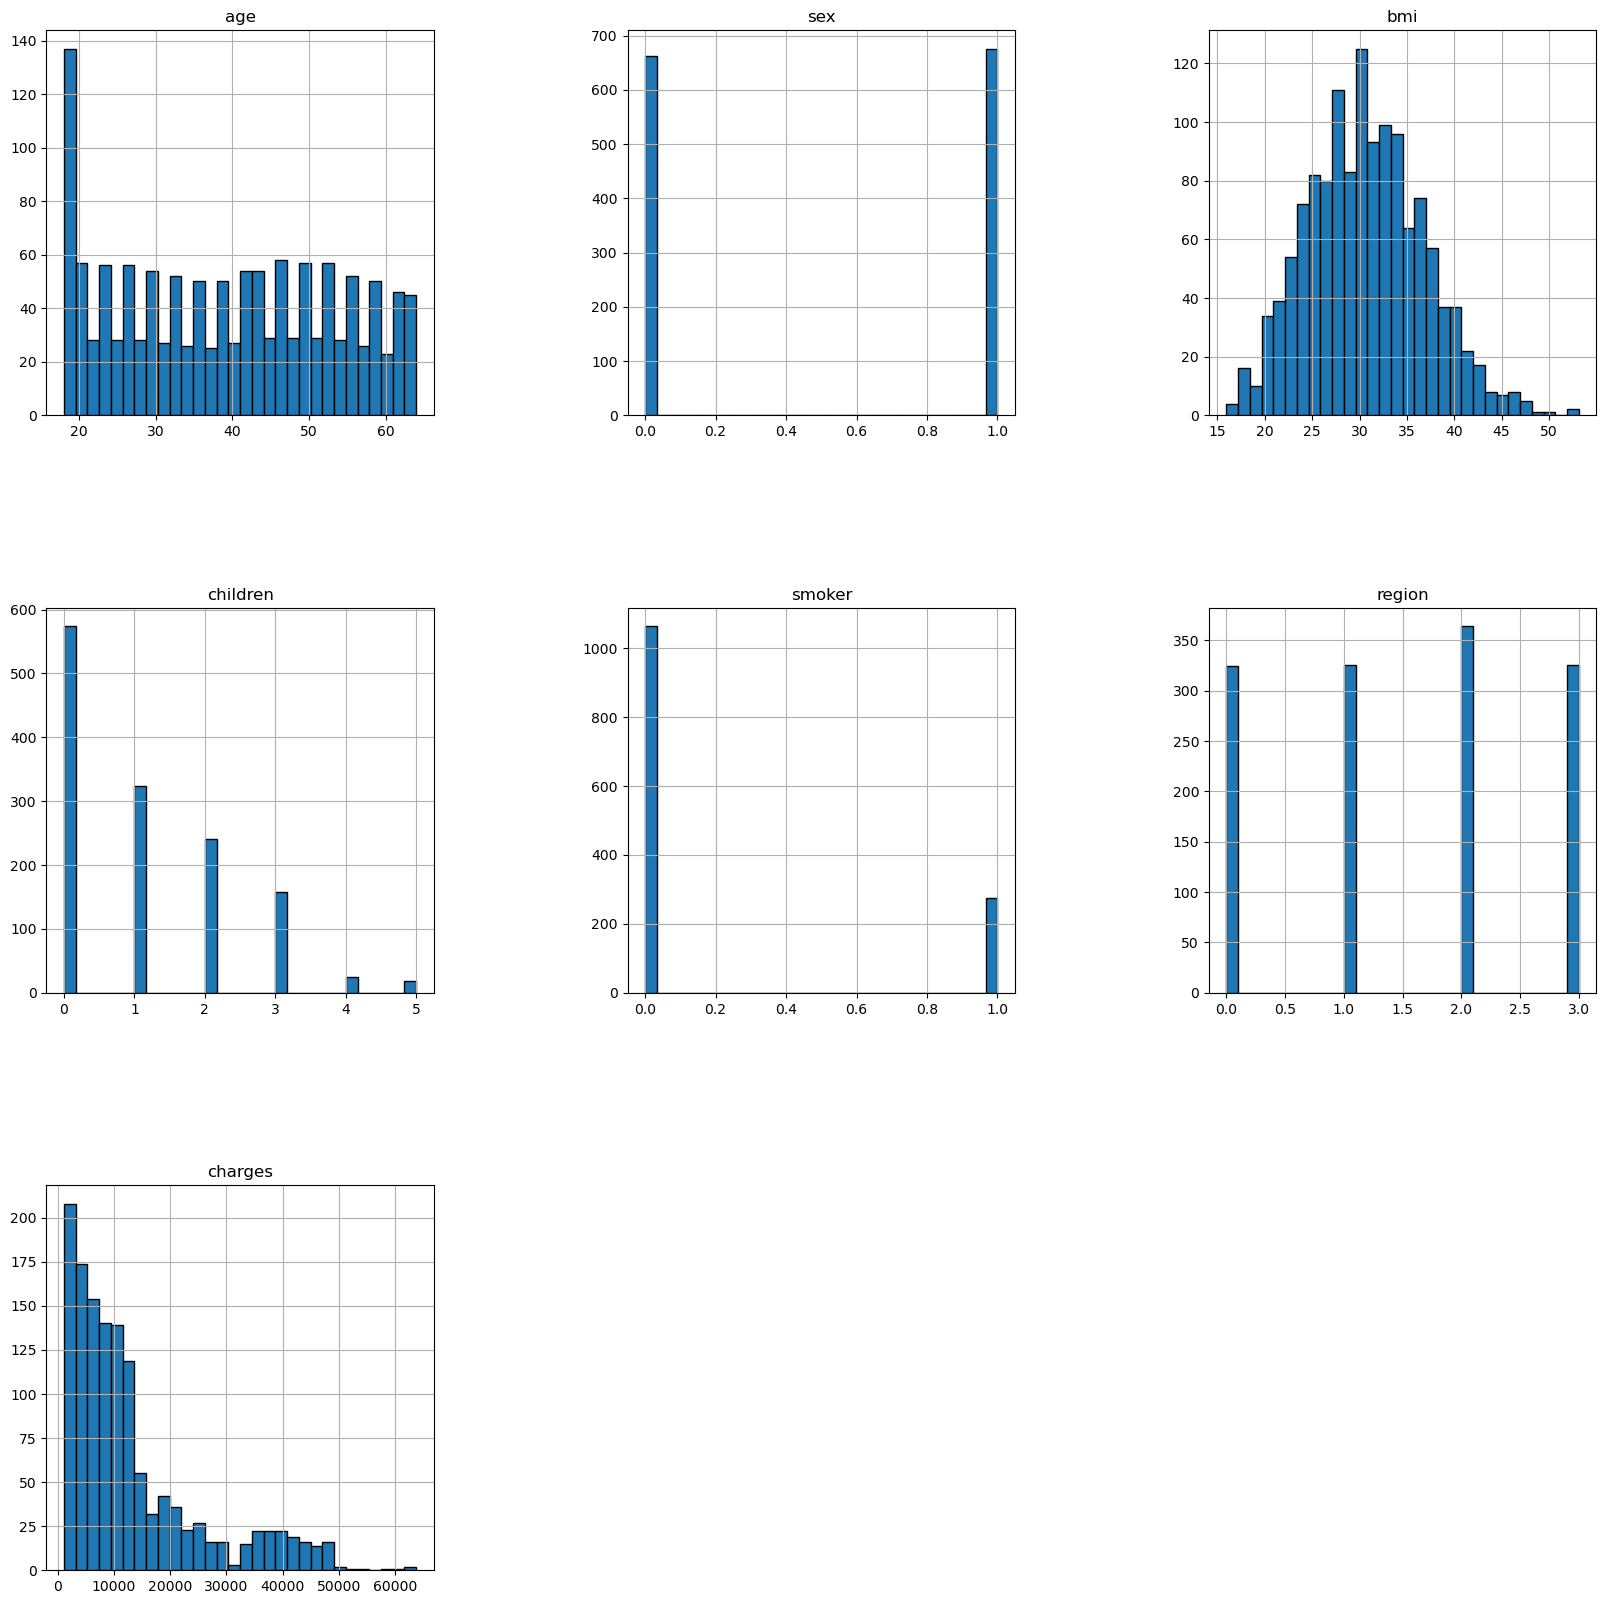

In [65]:
# Plot histograms for all columns in the DataFrame
df.hist(figsize=(20, 20), bins= 30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [7]:
# Define features (X) and variable answer (y)
X = df.drop('charges', axis=1)
y = df['charges'].copy()

# Split sets in Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model description
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions in the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 4186.508898366436
RMSE: 5799.587091438359
R²: 0.7833463107364537


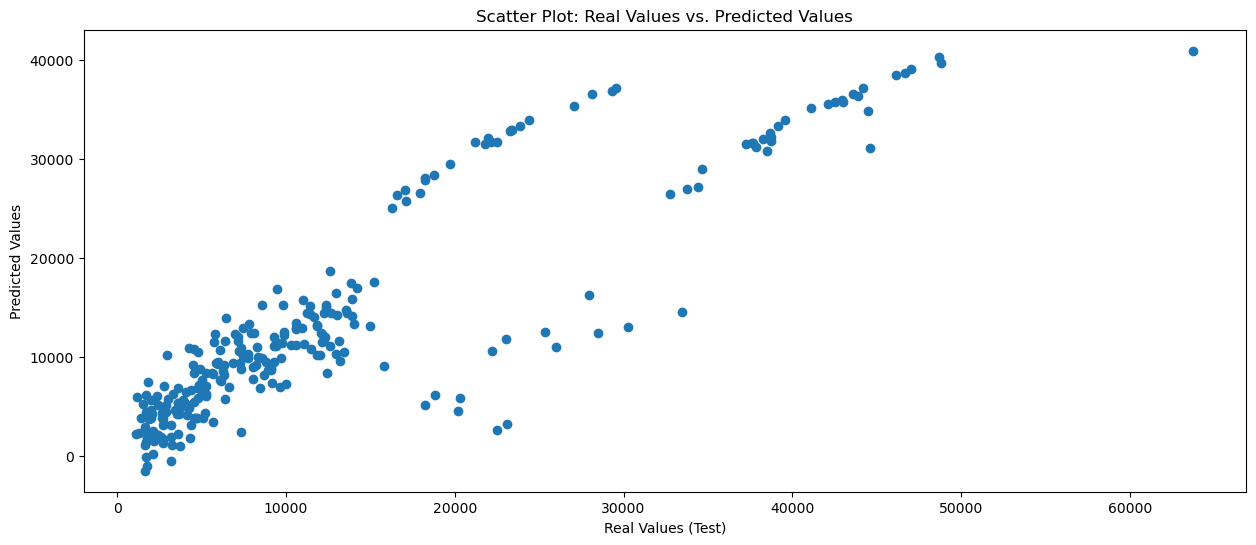

In [8]:
#Scatter Plot: Real Values vs. Predicted Values
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Real Values (Test)')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Real Values vs. Predicted Values');


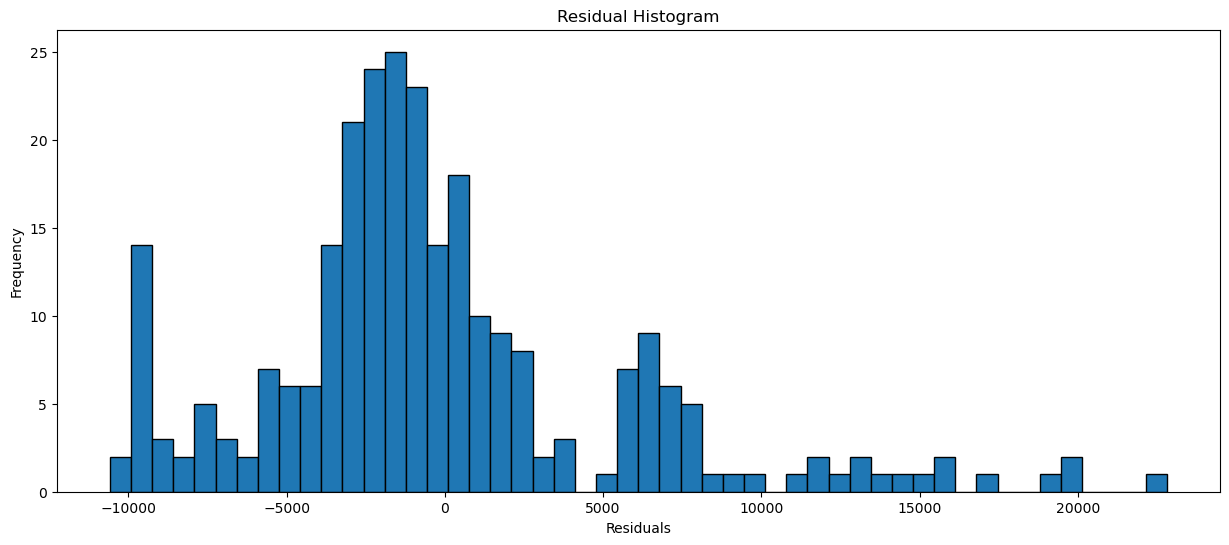

In [9]:
#Residual Histogram
residuals = y_test - y_pred   #Real values - Predict Values
plt.figure(figsize=(15, 6))
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram');

# If the values are proximity the zero, indicated that model os good.

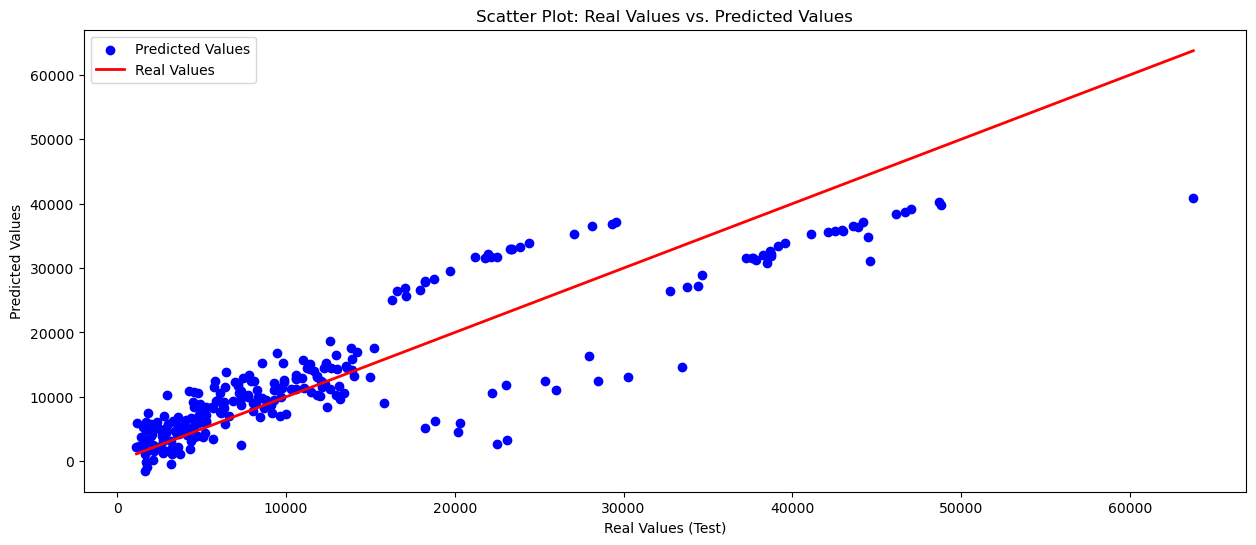

In [148]:
#Scatter Plot: Real Values vs. Predicted Values

plt.figure(figsize=(15, 6))

# Scatter plot for predicted values (in blue)
plt.scatter(y_test, y_pred, c='blue', label='Predicted Values')

# Red line to connect real values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label='Real Values')

plt.xlabel('Real Values (Test)')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Real Values vs. Predicted Values')
plt.legend();